___

## Prediksi Kualitas Susu Dengan Algoritma Machine Learning - Random Forest

___

In [1]:
# import libeary yang digunakan
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# load data
df = pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
# info type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [5]:
df.shape

(1059, 8)

### Visualisasi Data

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_12776\6797430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Grade'], palette='Set2')


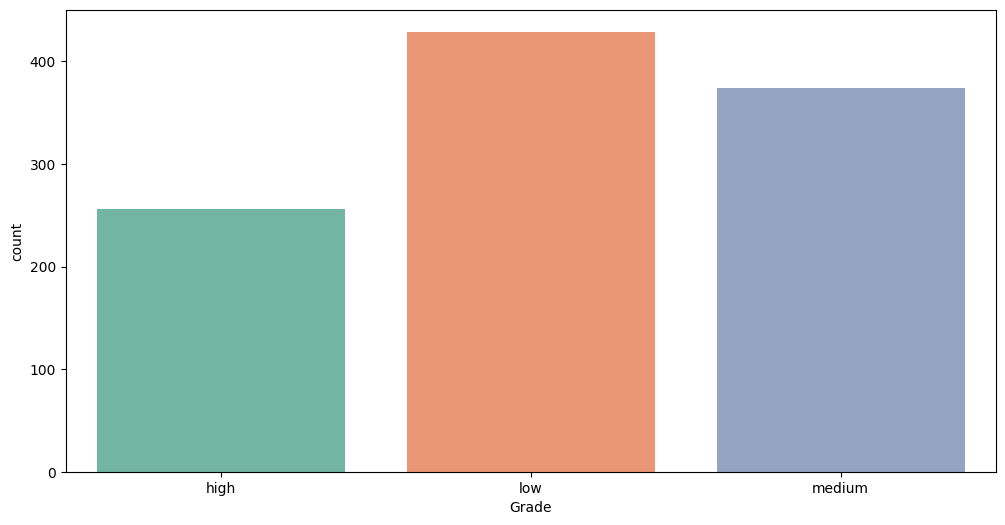

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Grade'], palette='Set2')
plt.show()

### Clean Data

In [7]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(976)

In [9]:
df.drop_duplicates(keep='last', inplace=True)


In [10]:
df.duplicated().sum()

np.int64(0)

### Modeling 

In [11]:
# spliting data
X = df.drop('Grade', axis=1)
y = df['Grade']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
# MinMaxScaler

MinMaxScaler = MinMaxScaler()

X_train_scaler = MinMaxScaler.fit_transform(X_train)
X_test_scaler = MinMaxScaler.fit_transform(X_test)

In [14]:
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

model = RandomForestClassifier()
model.fit(X_train_scaler,y_train)


RandomForestClassifier()

In [15]:
y_pred = model.predict(X_test_scaler)
print(f'Akurasi score = {accuracy_score(y_test,y_pred)}\n\n', classification_report(y_pred,y_test))

Akurasi score = 0.48

               precision    recall  f1-score   support

        high       0.00      0.00      0.00         0
         low       1.00      0.32      0.48        19
      medium       0.46      1.00      0.63         6

    accuracy                           0.48        25
   macro avg       0.49      0.44      0.37        25
weighted avg       0.87      0.48      0.52        25



c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [16]:
model.score(X_train,y_train), model.score(X_test,y_test)

c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


(0.3448275862068966, 0.24)

### Evalution

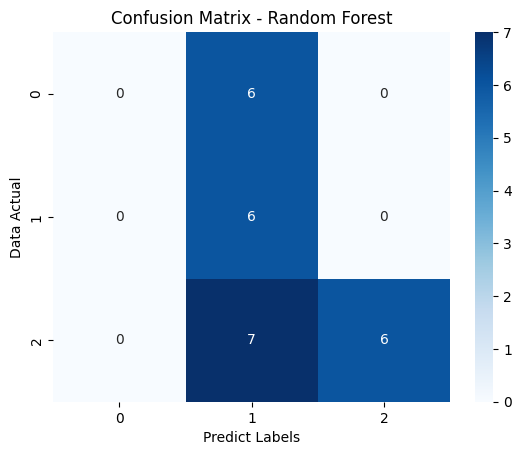

In [17]:
# --------------------------------
# Confusion Matrix - Random Forest
# --------------------------------


cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predict Labels')
plt.ylabel('Data Actual')
plt.show()

Dalam hal ini, model yang dibangun berhasil memprediksi sebagian data dengan benar. Model ini juga memiliki beberap kesalahan dalam memprediksinya seperti diclass 0 dan class 2 yang mana total nya ada 13 data yang salah.

In [18]:
# Tuning model - hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [100,150,200],
    'max_depth' : [20,50,80],
    'max_features' : [0.3,0.6,0.8],
    'min_samples_split' : [2,5,10]
}

model = GridSearchCV(estimator=model, param_grid=parameters, cv=3, n_jobs=-1, verbose=True)
model.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 50, 80],
                         'max_features': [0.3, 0.6, 0.8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

Akurasi model knn = 88.00% 

              precision    recall  f1-score   support

        high       0.75      1.00      0.86         6
         low       1.00      0.83      0.91         6
      medium       0.92      0.85      0.88        13

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.90      0.88      0.88        25



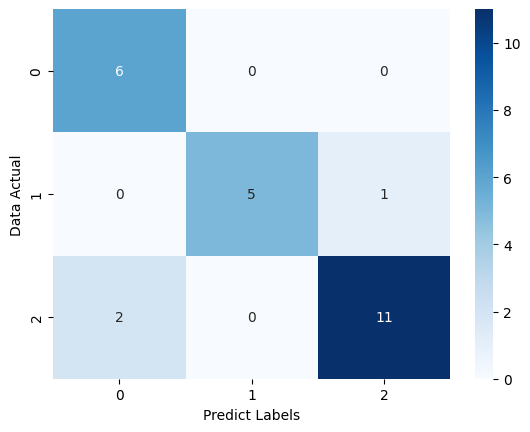

In [19]:
# --------------------------------
# Prediksi  - Random Forest
# --------------------------------
y_pred = model.predict(X_test)
print('Akurasi model knn = {a:.2f}% \n'.format(a=accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))


# ---------------------------------------
# Confusion Matrix - Random Forest
# ---------------------------------------
cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True,cmap='Blues', fmt='d', cbar='False')
plt.xlabel('Predict Labels')
plt.ylabel('Data Actual')

plt.show()


Setelah melakukan evalution model dengan meningkatkan kinerja model dengan hyperparameter tuning.Model berhasil meningkat menjadi 88% akurasi model. Dalam hal ini model dapat dikatakan cukup baik dalam melakukan prediction dengan data baru.

In [20]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9310344827586207, 0.88)

### Uji Model

In [21]:
# Uji model dengan data baru

df_uji = [
    [6.6,35,1,0,1,0,254],
    [8.5,70,1,1,1,1,246],
    [6.9,36,0,0,1,1,254]
]

In [22]:
X_uji = pd.DataFrame(df_uji, index=['Mato', 'Mutu', 'Mikel'], columns=X.columns)
X_uji

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
Mato,6.6,35,1,0,1,0,254
Mutu,8.5,70,1,1,1,1,246
Mikel,6.9,36,0,0,1,1,254


In [23]:
X_uji['Grade'] = model.predict(X_uji)
X_uji

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
Mato,6.6,35,1,0,1,0,254,high
Mutu,8.5,70,1,1,1,1,246,low
Mikel,6.9,36,0,0,1,1,254,high


___

### Save Model

In [25]:
# Menyimpan model yang telah dilatih
import pickle

pickle.dump(model, open('model.pkl', 'wb'))